In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

pd.options.mode.chained_assignment = None  

%matplotlib inline

In [2]:
data_df = pd.read_csv(r"D:\Olympic Dataset\updated_data.csv",index_col=0)

In [3]:
len(data_df)

206840

In order to gain high accuracy in our prediction, we will encode variables.<br/>
We want to predict if an individual can win an olympic medal.<br/>

In [4]:
data_df.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,Summer,Athens,Athletics,Athletics Men's Long Jump,Silver
1,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,Summer,Athens,Athletics,Athletics Men's Discus Throw,Gold
2,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,Summer,Athens,Athletics,Athletics Men's Shot Put,Gold
3,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,Summer,Athens,Athletics,Athletics Men's High Jump,Silver
4,Launceston Elliot,M,21.0,188.0,102.0,Great Britain,GBR,1896 Summer,1896,Summer,Athens,Wrestling,"Wrestling Men's Unlimited Class, Greco-Roman",No Medal


First, we will encode the medals by:<br/>
-     Have medal = 1
-     Does not have medal = 0
    

In [5]:
df2 = data_df.replace({'Gold':1,'Silver':1,'Bronze':1,'No Medal':0})

In [6]:
df2.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,Summer,Athens,Athletics,Athletics Men's Long Jump,1
1,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,Summer,Athens,Athletics,Athletics Men's Discus Throw,1
2,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,Summer,Athens,Athletics,Athletics Men's Shot Put,1
3,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,Summer,Athens,Athletics,Athletics Men's High Jump,1
4,Launceston Elliot,M,21.0,188.0,102.0,Great Britain,GBR,1896 Summer,1896,Summer,Athens,Wrestling,"Wrestling Men's Unlimited Class, Greco-Roman",0


Next, we will encode the seasons by: <br/>
-     Summer = 1
-     Winter = 0

In [7]:
df2.replace({'Summer':1,'Winter':0},inplace=True)

In [8]:
df2.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,1,Athens,Athletics,Athletics Men's Long Jump,1
1,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,1,Athens,Athletics,Athletics Men's Discus Throw,1
2,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,1,Athens,Athletics,Athletics Men's Shot Put,1
3,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,1,Athens,Athletics,Athletics Men's High Jump,1
4,Launceston Elliot,M,21.0,188.0,102.0,Great Britain,GBR,1896 Summer,1896,1,Athens,Wrestling,"Wrestling Men's Unlimited Class, Greco-Roman",0


Now, we will encode the genders by: <br/>
-     Male = 1
-     Female = 0

In [9]:
df2.replace({'M':1,'F':0},inplace=True)

In [10]:
df2.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,"Robert ""Bob"" Garrett",1,20.0,188.0,81.0,United States,USA,1896 Summer,1896,1,Athens,Athletics,Athletics Men's Long Jump,1
1,"Robert ""Bob"" Garrett",1,20.0,188.0,81.0,United States,USA,1896 Summer,1896,1,Athens,Athletics,Athletics Men's Discus Throw,1
2,"Robert ""Bob"" Garrett",1,20.0,188.0,81.0,United States,USA,1896 Summer,1896,1,Athens,Athletics,Athletics Men's Shot Put,1
3,"Robert ""Bob"" Garrett",1,20.0,188.0,81.0,United States,USA,1896 Summer,1896,1,Athens,Athletics,Athletics Men's High Jump,1
4,Launceston Elliot,1,21.0,188.0,102.0,Great Britain,GBR,1896 Summer,1896,1,Athens,Wrestling,"Wrestling Men's Unlimited Class, Greco-Roman",0


## Feature Selection

The games column is essentially consisted of both the year and the season columns.<br/>
Therefore, we will drop it.

In [11]:
new_df = df2.drop(columns=['Games'])

In [12]:
new_df.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,"Robert ""Bob"" Garrett",1,20.0,188.0,81.0,United States,USA,1896,1,Athens,Athletics,Athletics Men's Long Jump,1
1,"Robert ""Bob"" Garrett",1,20.0,188.0,81.0,United States,USA,1896,1,Athens,Athletics,Athletics Men's Discus Throw,1
2,"Robert ""Bob"" Garrett",1,20.0,188.0,81.0,United States,USA,1896,1,Athens,Athletics,Athletics Men's Shot Put,1
3,"Robert ""Bob"" Garrett",1,20.0,188.0,81.0,United States,USA,1896,1,Athens,Athletics,Athletics Men's High Jump,1
4,Launceston Elliot,1,21.0,188.0,102.0,Great Britain,GBR,1896,1,Athens,Wrestling,"Wrestling Men's Unlimited Class, Greco-Roman",0


In [13]:
print(len(new_df['Year'].unique()))
print(len(new_df['Age'].unique()))
print(len(new_df['Sport'].unique()))
print(len(new_df['Event'].unique()))
print(len(new_df['NOC'].unique()))
print(len(new_df['Team'].unique()))

35
28
56
590
226
660


We will drop irrelevant columns:

In [14]:
new_df2 = new_df.drop(columns=['Name','NOC','Team','City','Event'])

In [15]:
new_df2.head(5)

,Sex,Age,Height,Weight,Year,Season,Sport,Medal
0,1,20.0,188.0,81.0,1896,1,Athletics,1
1,1,20.0,188.0,81.0,1896,1,Athletics,1
2,1,20.0,188.0,81.0,1896,1,Athletics,1
3,1,20.0,188.0,81.0,1896,1,Athletics,1
4,1,21.0,188.0,102.0,1896,1,Wrestling,0


After all, the athlete's performance in every Olympic game and every sport it includes is measured by its own abilities.

In [16]:
new_df3 = new_df2.copy()

In [17]:
new_df3.head(5)

,Sex,Age,Height,Weight,Year,Season,Sport,Medal
0,1,20.0,188.0,81.0,1896,1,Athletics,1
1,1,20.0,188.0,81.0,1896,1,Athletics,1
2,1,20.0,188.0,81.0,1896,1,Athletics,1
3,1,20.0,188.0,81.0,1896,1,Athletics,1
4,1,21.0,188.0,102.0,1896,1,Wrestling,0


Now, we will remove the discontinues sports and those with insufficient amount of data. <br/>
We will remove sports with less than 1000 records.

In [18]:
new_df3.Sport.value_counts(sort=True,ascending=True)

Motorboating                     1
Lacrosse                         2
Art Competitions                16
Tug-Of-War                      22
Rugby                           30
Golf                           108
Trampolining                   149
Skeleton                       174
Rugby Sevens                   297
Curling                        410
Softball                       441
Triathlon                      526
Beach Volleyball               538
Taekwondo                      596
Rhythmic Gymnastics            615
Baseball                       846
Synchronized Swimming          849
Freestyle Skiing               913
Snowboarding                   924
Nordic Combined               1066
Modern Pentathlon             1261
Badminton                     1362
Luge                          1377
Short Track Speed Skating     1488
Figure Skating                1512
Table Tennis                  1789
Archery                       1884
Ski Jumping                   1968
Tennis              

In [19]:
updated_records = new_df3.Sport.value_counts().gt(1000)
updated_records

Athletics                     True
Swimming                      True
Gymnastics                    True
Cycling                       True
Rowing                        True
Cross Country Skiing          True
Shooting                      True
Fencing                       True
Alpine Skiing                 True
Canoeing                      True
Wrestling                     True
Sailing                       True
Biathlon                      True
Ice Hockey                    True
Equestrianism                 True
Football                      True
Boxing                        True
Speed Skating                 True
Hockey                        True
Basketball                    True
Judo                          True
Handball                      True
Volleyball                    True
Weightlifting                 True
Water Polo                    True
Bobsleigh                     True
Diving                        True
Tennis                        True
Ski Jumping         

In [20]:
invalid_sports = ['Snowboarding','Freestyle Skiing','Synchronized Swimming','Baseball','Rhythmic Gymnastics','Taekwondo',
                 'Beach Volleyball','Triathlon','Softball','Curling','Rugby Sevens','Skeleton','Trampolining','Golf',
                 'Rugby','Tug-Of-War','Art Competitions','Lacrosse','Motorboating']

In [21]:
updated_df = new_df3.loc[~new_df3.Sport.isin(invalid_sports)]
updated_df.reset_index(drop=True)

,Sex,Age,Height,Weight,Year,Season,Sport,Medal
0,1,20.0,188.0,81.0,1896,1,Athletics,1
1,1,20.0,188.0,81.0,1896,1,Athletics,1
2,1,20.0,188.0,81.0,1896,1,Athletics,1
3,1,20.0,188.0,81.0,1896,1,Athletics,1
4,1,21.0,188.0,102.0,1896,1,Wrestling,0
...,...,...,...,...,...,...,...,...
199378,1,21.0,186.0,83.0,2016,1,Swimming,0
199379,1,27.0,172.0,65.0,2016,1,Cycling,0
199380,1,30.0,183.0,64.0,2016,1,Athletics,0
199381,1,33.0,200.0,105.0,2016,1,Handball,0


In [22]:
sports = updated_df.Sport.unique()
sports

array(['Athletics', 'Wrestling', 'Gymnastics', 'Weightlifting', 'Fencing',
       'Swimming', 'Water Polo', 'Boxing', 'Tennis', 'Cycling', 'Diving',
       'Rowing', 'Football', 'Hockey', 'Shooting', 'Equestrianism',
       'Sailing', 'Ice Hockey', 'Figure Skating', 'Speed Skating',
       'Cross Country Skiing', 'Nordic Combined', 'Ski Jumping',
       'Modern Pentathlon', 'Bobsleigh', 'Basketball', 'Handball',
       'Alpine Skiing', 'Canoeing', 'Biathlon', 'Luge', 'Volleyball',
       'Judo', 'Archery', 'Table Tennis', 'Badminton',
       'Short Track Speed Skating'], dtype=object)

Now, we will encode the sports by label encoder:

In [23]:
le = preprocessing.LabelEncoder()
updated_df.loc[:,['Sport']] = le.fit_transform(updated_df['Sport'])

## <br/>Binning numerical variables

In [24]:
# Discretization using binning

#updated_df['Age'].value_counts()
#updated_df['Height'].value_counts().sort_index()
#updated_df['Weight'].value_counts().sort_index()
#updated_df['Year'].value_counts()

age_bins = [10, 16, 21, 26, 31, 36, 40]
age_labels=[0,1,2,3,4,5]
updated_df['Age'] = pd.cut(updated_df['Age'], age_bins, labels = age_labels)

height_bins = [125, 130, 140, 150, 160, 165, 170, 175, 180, 185, 190, 195, 200, 230]
height_labels=[0,1,2,3,4,5,6,7,8,9,10,11,12]
updated_df['Height'] = pd.cut(updated_df['Height'], height_bins, labels = height_labels)

weight_bins = [20, 40, 60, 75, 90, 100, 120, 150, 200, 220]
weight_labels=[0,1,2,3,4,5,6,7,8]
updated_df['Weight'] = pd.cut(updated_df['Weight'], weight_bins, labels = weight_labels)

In [25]:
updated_df['Age'].value_counts().sort_index()

#updated_df['NaN']
#updated_df.isna().sum()
#updated_df.Age.unique()

0     5837
1    45751
2    85354
3    45760
4    14561
5     2120
Name: Age, dtype: int64

In [26]:
print(updated_df.Weight[updated_df['Age']=='NaN'])

Series([], Name: Weight, dtype: category
Categories (9, int64): [0 < 1 < 2 < 3 ... 5 < 6 < 7 < 8])


In [27]:
updated_df.head(5)

,Sex,Age,Height,Weight,Year,Season,Sport,Medal
0,1,1,9,3,1896,1,2,1
1,1,1,9,3,1896,1,2,1
2,1,1,9,3,1896,1,2,1
3,1,1,9,3,1896,1,2,1
4,1,1,9,5,1896,1,36,0


In [28]:
print(updated_df.shape)

(199383, 8)


<!-- But, we should ignore the discontinued sports! -->

In [29]:
###################################### ML PHASE ######################################

At this point, after the whole process above, we are ready to start the ML phase.

## What are we trying to predict?
We are attempting to forecast whether or not an individual can win an Olympic medal based on his personal statistics and skills.

Essentially, our learning model is a supervised one.<br/>
Our problem is a classification problem since we are trying to predict a certain categorical variable value.

First, we will make use of a **logistic regression model**.

In [30]:
X = updated_df.drop(columns=['Medal'])
y = updated_df['Medal']

In [31]:
# Split into training and test sets & Scaling
scaler = StandardScaler()
scaler.fit(X.values)
scaled_features = scaler.fit_transform(X.values)
df_scaled = pd.DataFrame(scaled_features, columns=X.columns)
X1 = df_scaled
y1 = y
X_train, X_test, y_train, y_test = train_test_split(X1.values, y1, random_state=3, test_size=0.2)

In [32]:
print(X_train.shape, X_test.shape)

(159506, 7) (39877, 7)


In [33]:
print(y_train.shape, y_test.shape)

(159506,) (39877,)


In [34]:
# set up the model, logistic regression model 
lrm = LogisticRegression()
lrm.fit(X_train,y_train)
y_pred = lrm.predict(X_test)

# Measuring model performance
print('Accuracy Score:',lrm.score(X_test,y_test))
print('f1 score:',f1_score(y_test,y_pred,average='micro'))
print('Precision score:',precision_score(y_test,y_pred,average='micro'))
print('Recall score:',recall_score(y_test,y_pred,average='micro'))

Accuracy Score: 0.8553050630689369
f1 score: 0.8553050630689369
Precision score: 0.8553050630689369
Recall score: 0.8553050630689369


Text(0.5, 24.0, 'Predicted label')

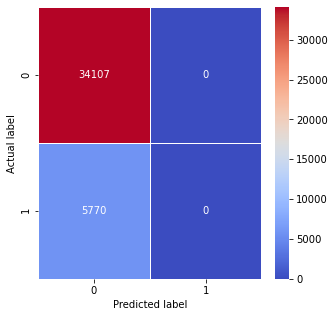

In [35]:
# Confusion Matrix
plt.figure(figsize=(5,5))
cm_lrm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_lrm,annot=True,linewidth=0.5,fmt='.0f', cmap='coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**We can see that the model above has not predicted even a single label as '1'**

Next, we will use another algorithm, **decision tree!**

In [36]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

print('Accuracy Score:',dtc.score(X_test,y_pred))
print('f1 score:',f1_score(y_test,y_pred,average='micro'))
print('Precision score:',precision_score(y_test,y_pred,average='micro'))
print('Recall score:',recall_score(y_test,y_pred,average='micro'))

Accuracy Score: 1.0
f1 score: 0.8387040148456504
Precision score: 0.8387040148456504
Recall score: 0.8387040148456504


Text(0.5, 24.0, 'Predicted label')

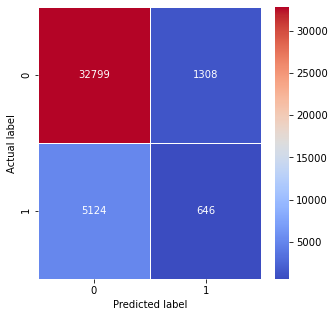

In [37]:
# Confusion Matrix
plt.figure(figsize=(5,5))
cm_dtc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dtc,annot=True,linewidth=0.5,fmt='.0f', cmap='coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Since the accuracy is 1, there might be an **overfitting** issue.<br/>

We will handle it by using **Random Forest algorithm!**

In [38]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

print('Accuracy Score:',rfc.score(X_test,y_test))
print('f1 score:',f1_score(y_test,y_pred,average='micro'))
print('Precision score:',precision_score(y_test,y_pred,average='micro'))
print('Recall score:',recall_score(y_test,y_pred,average='micro'))

Accuracy Score: 0.8382526268274946
f1 score: 0.8382526268274946
Precision score: 0.8382526268274946
Recall score: 0.8382526268274946


Text(0.5, 24.0, 'Predicted label')

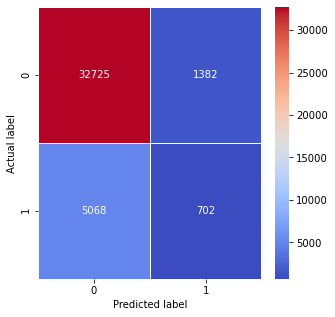

In [39]:
# Confusion Matrix
plt.figure(figsize=(5,5))
cm_rfc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rfc,annot=True,linewidth=0.5,fmt='.0f', cmap='coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Lastly, we will use **naive bayes**

In [40]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

print('Accuracy Score:',gnb.score(X_test,y_test))
print('f1 score:',f1_score(y_test,y_pred,average='micro'))
print('Precision score:',precision_score(y_test,y_pred,average='micro'))
print('Recall score:',recall_score(y_test,y_pred,average='micro'))

Accuracy Score: 0.8463776111542994
f1 score: 0.8463776111542994
Precision score: 0.8463776111542994
Recall score: 0.8463776111542994


Text(0.5, 24.0, 'Predicted label')

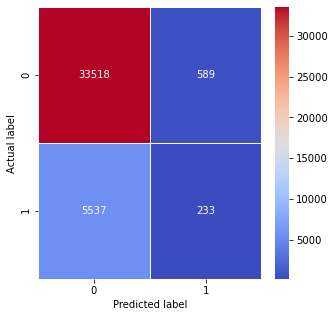

In [41]:
# Confusion Matrix
plt.figure(figsize=(5,5))
cm_gnb = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_gnb,annot=True,linewidth=0.5,fmt='.0f', cmap='coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

So, our best model was able to attain an 85% success rate!

WOW Effect #2

In [111]:
# Let us insert my own details and get the prediction result

In [112]:
# Sex, Age, Height, Weight, Year, Season, Sport 								 Medal

# Now, we have 37 different Sports encoded respectively from 0 to 36

#data = {'Sex':1, 'Age':1,'Height':1, 'Weight':1, 'Season':[0, 1], 'Sport':[i for i in range(0,37)]}

my_X = pd.DataFrame(0, index = [i for i in range(0,74)],
                                     columns=['Sex', 'Age', 'Height', 'Weight', 'Year', 'Season', 'Sport'])
# Sex, Age
my_X.iloc[:,0:2] = 1

# Height, Weight
my_X.iloc[:,2] = 7
my_X.iloc[:,3] = 1

# Year
my_X.iloc[:,4] = 2020

# Seasons
my_X.iloc[0:37,5] = 0
my_X.iloc[37:74,5] = 1

# Sports
my_X.iloc[0:37,6] = list(range(0,37))
my_X.iloc[37:74,6] = list(range(0,37))

my_X

,Sex,Age,Height,Weight,Year,Season,Sport
0,1,1,7,1,2020,0,0
1,1,1,7,1,2020,0,1
2,1,1,7,1,2020,0,2
3,1,1,7,1,2020,0,3
4,1,1,7,1,2020,0,4
...,...,...,...,...,...,...,...
69,1,1,7,1,2020,1,32
70,1,1,7,1,2020,1,33
71,1,1,7,1,2020,1,34
72,1,1,7,1,2020,1,35


In [113]:
# We will use our 2 best models - Random Forest & Gaussian Naive Bayes.
# Note that the Decision Tree model has an overfitting issue.
# Note that the Logistic Regression did not predict correctly even a single medalist

In [114]:
# Random Forest
y_pred_rfc = rfc.predict(my_X)
result_df_rfc = pd.DataFrame(y_pred_rfc,columns=['Medal Prediction'])

In [115]:
sports_df1 = result_df_rfc[result_df_rfc['Medal Prediction']==1]
sports_df1.index

Int64Index([], dtype='int64')

In [116]:
# Naive Bayes
y_pred_gnb = gnb.predict(my_X)
result_df_gnb = pd.DataFrame(y_pred_gnb,columns=['Medal Prediction'])

In [117]:
sports_df2 = result_df_gnb[result_df_gnb['Medal Prediction']==1]
sports_df2.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73],
           dtype='int64')

In [118]:
#print(my_X)

So, we can figure out after investigating our 2 top performencing models that:<br/>
-    The Random Forest Classifier predicted that I will get even not a single medal.
-    On the opposite side, the Gaussian Naive Bayes Model predicted that I have a potential to win an Olympic medal 
     on 7 different sports! <br/><br/>
We can conclude from 
that information that we can not predict for sure, but with pretty good stats we definitely can!

Let us see which sports we are talking about:

In [119]:
predicted_indices = [0,1,2,3,4,5,6,37,38,39,40,41,42,43]
sports_X = my_X.loc[predicted_indices,:]
sports_X

,Sex,Age,Height,Weight,Year,Season,Sport
0,1,1,7,1,2020,0,0
1,1,1,7,1,2020,0,1
2,1,1,7,1,2020,0,2
3,1,1,7,1,2020,0,3
4,1,1,7,1,2020,0,4
5,1,1,7,1,2020,0,5
6,1,1,7,1,2020,0,6
37,1,1,7,1,2020,1,0
38,1,1,7,1,2020,1,1
39,1,1,7,1,2020,1,2


In [120]:
sports_X['Sport'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [121]:
le.inverse_transform(sports_X['Sport'].unique())

array(['Alpine Skiing', 'Archery', 'Athletics', 'Badminton', 'Basketball',
       'Biathlon', 'Bobsleigh'], dtype=object)

Surprisingly, half of these sports, particularly basketball, are ones that I enjoy.<br/>
Who knows, perhaps one day I'll win an Olympic medal...